<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/Jeongbogun/124ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


In [8]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
enc= models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [11]:
dec = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9216)              599040    
_________________________________________________________________
reshape_1 (Reshape)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 113s 59ms/step - loss: 900.0701
Epoch 2/10
1875/1875 [==============================] - 112s 60ms/step - loss: 355.2187
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 277.2370
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 240.1855
Epoch 5/10
1875/1875 [==============================] - 114s 61ms/step - loss: 217.4472
Epoch 6/10
1875/1875 [==============================] - 115s 61ms/step - loss: 201.8109
Epoch 7/10
1875/1875 [==============================] - 115s 62ms/step - loss: 190.9833
Epoch 8/10
1875/1875 [==============================] - 116s 62ms/step - loss: 182.6674
Epoch 9/10
1875/1875 [==============================] - 116s 62ms/step - loss: 176.1723
Epoch 10/10
1875/1875 [==============================] - 116s 62ms/step - loss: 170.6002


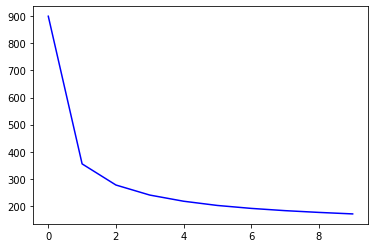

In [12]:
AE_CNN = models.Sequential([enc, dec])
AE_CNN.compile(loss = 'mse')
X = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X, X, epochs = 10)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

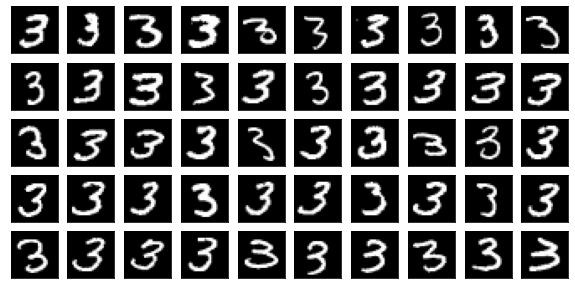

In [13]:
three_idx = train_labels == 3 
three_array = train_images[three_idx]
plot_images(5, 10, three_array.reshape(-1, 28, 28))

In [15]:
print(train_images.shape)
three_array = three_array.reshape(-1,28,28, 1)
three_encoded = enc.predict(three_array)
plot_images(5, 10, three_encoded.reshape(-1, 10, 10))

(60000, 28, 28)


ValueError: ignored

In [ ]:
three_latent = three_encoded.mean(axis = 0)
plt.imshow(three_latent.reshape(10,10), cmap='gray')

In [ ]:
three_latent_augmented = []
for _ in range(50):
    new_three = three_latent*(1+np.random.randn(100)*0.3)
    three_latent_augmented.append(new_three) 
three_latent_augmented = np.array(three_latent_augmented)

In [ ]:
three_generated = dec.predict([three_latent_augmented])
plot_images(5, 10, three_generated.reshape(-1, 28, 28))